# Libraries

In [1]:
# project_path = 'put_your_project_path_here'
project_path = '../../'

In [2]:
import sys
sys.path.insert(1, project_path)   # caution: path[0] is reserved for script path (or '' in REPL)

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training
from sklearn import linear_model
from sklearn import metrics
import copy
from mv_utils import lasso_rank, LDA_eval
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading Dataset

In [3]:
X, y, ID = data_loader.load_dataset(X_path='../../data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='../../data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='../../data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 

data loaded in 0.07001447677612305ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302

# Full cycle of feature selection

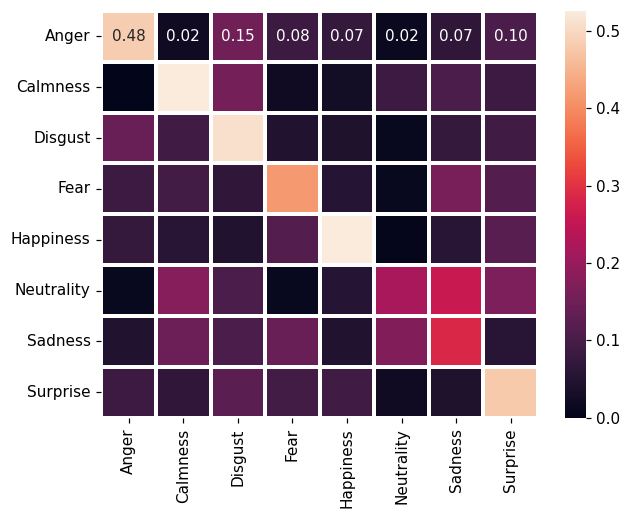

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.484375  0.020833  0.151042  0.083333   0.072917    0.015625   
Calmness    0.000000  0.526042  0.156250  0.020833   0.026042    0.083333   
Disgust     0.140625  0.088542  0.510417  0.046875   0.041667    0.010417   
Fear        0.083333  0.093750  0.067708  0.416667   0.052083    0.010417   
Happiness   0.072917  0.057292  0.046875  0.114583   0.526042    0.005208   
Neutrality  0.010417  0.177083  0.104167  0.010417   0.052083    0.218750   
Sadness     0.046875  0.145833  0.104167  0.140625   0.046875    0.171875   
Surprise    0.083333  0.067708  0.125000  0.093750   0.088542    0.020833   

             Sadness  Surprise  
Anger       0.067708  0.104167  
Calmness    0.104167  0.083333  
Disgust     0.072917  0.088542  
Fear        0.161458  0.114583  
Happiness   0.057292  0.119792  
Neutrality  0.260417  0.166667  
Sadness     0.286458  0.057292  
Surprise    0.041667  0.479167  
Saving co

  0%|          | 0/306 [00:00<?, ?it/s]

Iter =  1  UAR = 0.5000


  5%|▌         | 16/306 [00:00<00:10, 28.93it/s]

Iter =  11  UAR = 0.5037
Iter =  12  UAR = 0.5238
Iter =  16  UAR = 0.5339


  7%|▋         | 22/306 [00:00<00:10, 26.29it/s]

Iter =  18  UAR = 0.5707
Iter =  20  UAR = 0.5711
Iter =  21  UAR = 0.5755
Iter =  22  UAR = 0.5811


  9%|▉         | 28/306 [00:01<00:11, 23.90it/s]

Iter =  26  UAR = 0.5826
Iter =  27  UAR = 0.5882
Iter =  30  UAR = 0.6001


 12%|█▏        | 37/306 [00:01<00:13, 20.08it/s]

Iter =  36  UAR = 0.6075


 14%|█▍        | 44/306 [00:01<00:15, 16.83it/s]

Iter =  43  UAR = 0.6179
Iter =  45  UAR = 0.6194


 16%|█▋        | 50/306 [00:02<00:17, 14.38it/s]

Iter =  49  UAR = 0.6243


 18%|█▊        | 54/306 [00:02<00:19, 12.93it/s]

Iter =  52  UAR = 0.6246


 18%|█▊        | 56/306 [00:02<00:20, 12.12it/s]

Iter =  55  UAR = 0.6298
Iter =  56  UAR = 0.6339
Iter =  57  UAR = 0.6399


 21%|██        | 64/306 [00:03<00:23, 10.18it/s]

Iter =  63  UAR = 0.6447
Iter =  64  UAR = 0.6551


 22%|██▏       | 66/306 [00:04<00:24,  9.80it/s]

Iter =  65  UAR = 0.6596


 23%|██▎       | 70/306 [00:04<00:26,  8.99it/s]

Iter =  69  UAR = 0.6641


 24%|██▎       | 72/306 [00:04<00:27,  8.53it/s]

Iter =  71  UAR = 0.6644
Iter =  72  UAR = 0.6737


 25%|██▌       | 77/306 [00:05<00:29,  7.67it/s]

Iter =  76  UAR = 0.6786
Iter =  77  UAR = 0.6789


 26%|██▌       | 80/306 [00:05<00:31,  7.21it/s]

Iter =  79  UAR = 0.6793
Iter =  80  UAR = 0.6849


 27%|██▋       | 82/306 [00:06<00:32,  6.85it/s]

Iter =  81  UAR = 0.6938


100%|██████████| 306/306 [01:58<00:00,  2.58it/s]


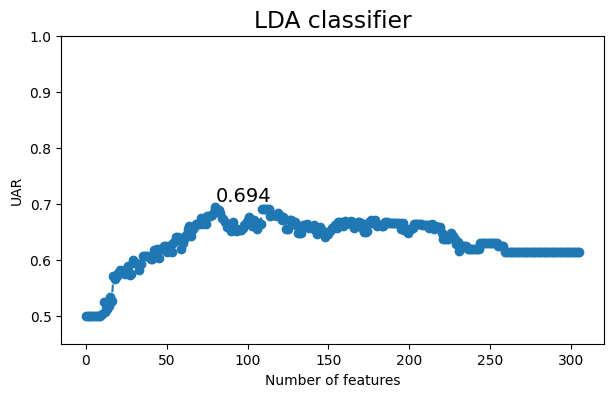

uar_best = 0.69382440
best uar (LDA) =  0.6938244047619048 Number of features =  80
NEW ROUND
Iter #7: 0.694 <-> 0.694
Iter #9: 0.694 <-> 0.694
Iter #10: 0.711 <-> 0.694
Iter #11: 0.694 <-> 0.694
Iter #13: 0.694 <-> 0.694
Iter #16: 0.695 <-> 0.694
Iter #18: 0.694 <-> 0.694
Iter #19: 0.695 <-> 0.694
Iter #20: 0.695 <-> 0.694
Iter #23: 0.700 <-> 0.694
Iter #25: 0.695 <-> 0.694
Iter #26: 0.705 <-> 0.694
Iter #30: 0.694 <-> 0.694
Iter #37: 0.696 <-> 0.694
Iter #44: 0.694 <-> 0.694
Iter #47: 0.694 <-> 0.694
Iter #48: 0.695 <-> 0.694
Iter #49: 0.694 <-> 0.694
Iter #51: 0.694 <-> 0.694
Iter #53: 0.704 <-> 0.694
Iter #55: 0.695 <-> 0.694
Iter #62: 0.705 <-> 0.694
Iter #66: 0.699 <-> 0.694
Iter #68: 0.700 <-> 0.694
Iter #69: 0.694 <-> 0.694
Iter #73: 0.694 <-> 0.694
Iter #77: 0.694 <-> 0.694
Withdraw feature #10, added accracy 0.01748511904761907
NEW ROUND
Iter #0: 0.712 <-> 0.711
Iter #5: 0.711 <-> 0.711
Iter #7: 0.712 <-> 0.711
Iter #9: 0.712 <-> 0.711
Iter #10: 0.711 <-> 0.711
Iter #15: 0.71

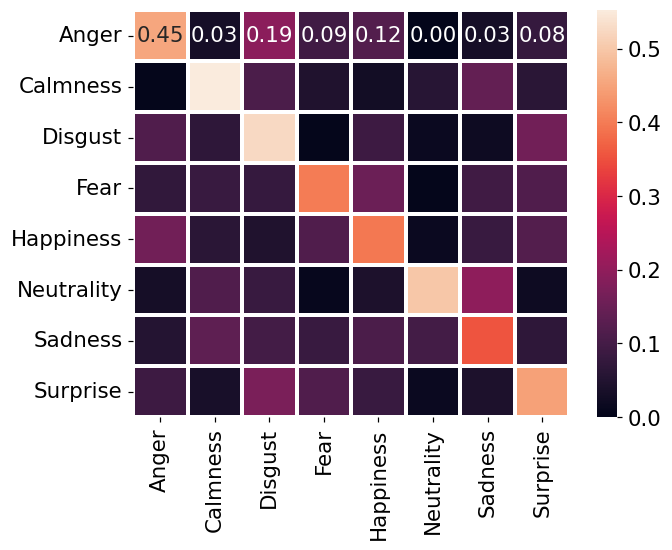

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.453125  0.031250  0.192708  0.093750   0.119792    0.000000   
Calmness    0.005208  0.552083  0.109375  0.046875   0.026042    0.057292   
Disgust     0.114583  0.067708  0.526042  0.005208   0.088542    0.015625   
Fear        0.072917  0.083333  0.078125  0.401042   0.151042    0.005208   
Happiness   0.161458  0.062500  0.046875  0.114583   0.395833    0.015625   
Neutrality  0.031250  0.114583  0.083333  0.010417   0.041667    0.500000   
Sadness     0.052083  0.135417  0.098958  0.083333   0.109375    0.098958   
Surprise    0.088542  0.036458  0.171875  0.114583   0.083333    0.015625   

             Sadness  Surprise  
Anger       0.031250  0.078125  
Calmness    0.140625  0.062500  
Disgust     0.020833  0.161458  
Fear        0.093750  0.114583  
Happiness   0.083333  0.119792  
Neutrality  0.197917  0.020833  
Sadness     0.354167  0.067708  
Surprise    0.041667  0.447917  
Saving co

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.008e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:05<17:59,  5.42s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.008e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:10<16:45,  5.08s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coord

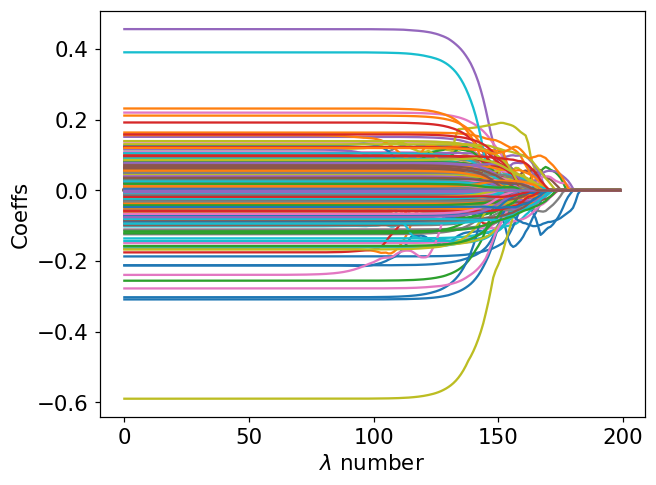

  1%|▏         | 4/306 [00:00<00:09, 31.99it/s]

Iter =  1  UAR = 0.5054
Iter =  3  UAR = 0.5218
Iter =  4  UAR = 0.5256
Iter =  5  UAR = 0.5266


  4%|▍         | 12/306 [00:00<00:09, 30.29it/s]

Iter =  8  UAR = 0.5501
Iter =  9  UAR = 0.5697
Iter =  11  UAR = 0.5719
Iter =  12  UAR = 0.5849
Iter =  13  UAR = 0.5909


  5%|▌         | 16/306 [00:00<00:10, 28.66it/s]

Iter =  14  UAR = 0.6102


  7%|▋         | 22/306 [00:00<00:10, 25.89it/s]

Iter =  19  UAR = 0.6168
Iter =  20  UAR = 0.6216
Iter =  21  UAR = 0.6246
Iter =  22  UAR = 0.6312
Iter =  23  UAR = 0.6364


  9%|▉         | 28/306 [00:01<00:11, 23.58it/s]

Iter =  25  UAR = 0.6434
Iter =  26  UAR = 0.6486


 10%|█         | 31/306 [00:01<00:12, 22.04it/s]

Iter =  30  UAR = 0.6562


 12%|█▏        | 37/306 [00:01<00:13, 19.77it/s]

Iter =  34  UAR = 0.6625


 14%|█▎        | 42/306 [00:01<00:14, 17.70it/s]

Iter =  40  UAR = 0.6629


 14%|█▍        | 44/306 [00:02<00:15, 16.63it/s]

Iter =  43  UAR = 0.6633


 25%|██▌       | 77/306 [00:05<00:30,  7.63it/s]

Iter =  76  UAR = 0.6647
Iter =  77  UAR = 0.6657


 27%|██▋       | 84/306 [00:06<00:33,  6.63it/s]

Iter =  83  UAR = 0.6705


100%|██████████| 306/306 [01:59<00:00,  2.56it/s]


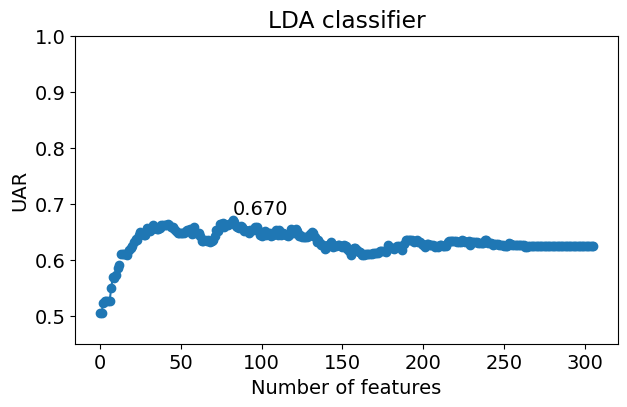

uar_best = 0.67047276
best uar (LDA) =  0.6704727564102564 Number of features =  82
NEW ROUND
Iter #0: 0.670 <-> 0.670
Iter #1: 0.670 <-> 0.670
Iter #3: 0.673 <-> 0.670
Iter #5: 0.670 <-> 0.670
Iter #6: 0.670 <-> 0.670
Iter #7: 0.672 <-> 0.670
Iter #9: 0.672 <-> 0.670
Iter #15: 0.670 <-> 0.670
Iter #35: 0.670 <-> 0.670
Iter #37: 0.670 <-> 0.670
Iter #42: 0.670 <-> 0.670
Iter #45: 0.670 <-> 0.670
Iter #47: 0.671 <-> 0.670
Iter #48: 0.670 <-> 0.670
Iter #49: 0.670 <-> 0.670
Iter #50: 0.670 <-> 0.670
Iter #51: 0.670 <-> 0.670
Iter #52: 0.670 <-> 0.670
Iter #60: 0.672 <-> 0.670
Iter #73: 0.672 <-> 0.670
Iter #77: 0.670 <-> 0.670
Iter #80: 0.671 <-> 0.670
Withdraw feature #3, added accracy 0.0030048076923077094
NEW ROUND
Iter #0: 0.677 <-> 0.673
Iter #3: 0.673 <-> 0.673
Iter #8: 0.674 <-> 0.673
Iter #10: 0.677 <-> 0.673
Iter #14: 0.675 <-> 0.673
Iter #16: 0.673 <-> 0.673
Iter #17: 0.673 <-> 0.673
Iter #18: 0.673 <-> 0.673
Iter #19: 0.673 <-> 0.673
Iter #20: 0.673 <-> 0.673
Iter #33: 0.673 <

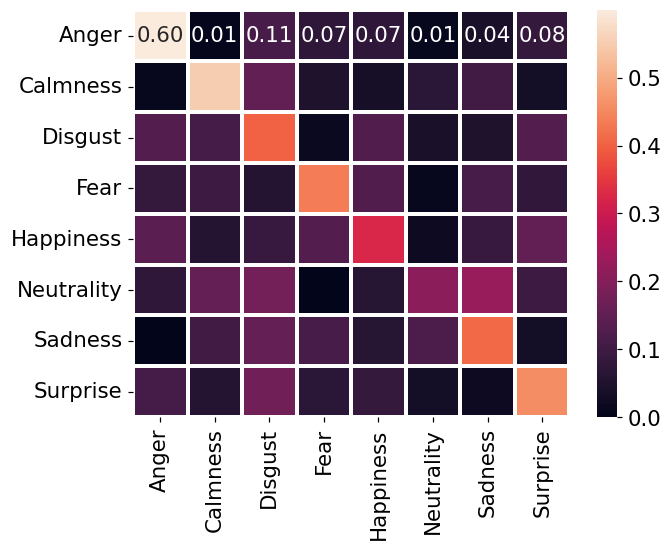

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.598958  0.005208  0.114583  0.072917   0.072917    0.010417   
Calmness    0.010417  0.552083  0.151042  0.046875   0.036458    0.067708   
Disgust     0.130208  0.109375  0.401042  0.015625   0.125000    0.041667   
Fear        0.083333  0.093750  0.057292  0.437500   0.125000    0.010417   
Happiness   0.140625  0.057292  0.088542  0.130208   0.322917    0.020833   
Neutrality  0.072917  0.156250  0.177083  0.000000   0.062500    0.208333   
Sadness     0.000000  0.104167  0.156250  0.114583   0.062500    0.119792   
Surprise    0.109375  0.057292  0.171875  0.067708   0.083333    0.031250   

             Sadness  Surprise  
Anger       0.041667  0.083333  
Calmness    0.104167  0.031250  
Disgust     0.046875  0.130208  
Fear        0.114583  0.078125  
Happiness   0.088542  0.151042  
Neutrality  0.229167  0.093750  
Sadness     0.411458  0.031250  
Surprise    0.020833  0.458333  
Saving co

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:05<18:12,  5.49s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:10<16:50,  5.10s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coord

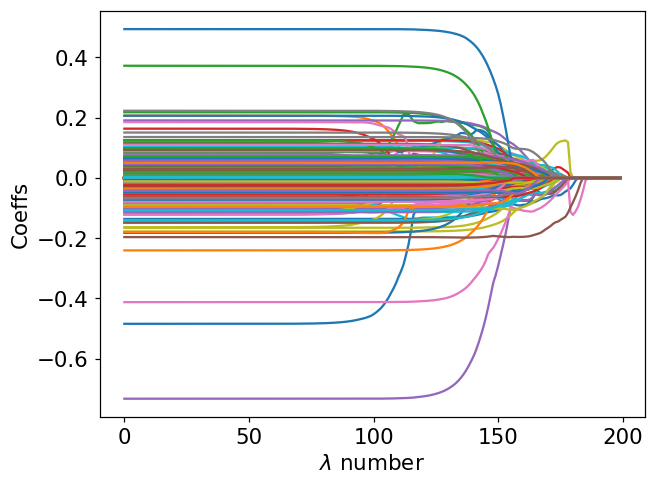

  1%|▏         | 4/306 [00:00<00:09, 31.24it/s]

Iter =  1  UAR = 0.5278
Iter =  5  UAR = 0.6190
Iter =  6  UAR = 0.6633


  4%|▍         | 12/306 [00:00<00:09, 30.49it/s]

Iter =  8  UAR = 0.6691
Iter =  9  UAR = 0.6975


  5%|▌         | 16/306 [00:00<00:09, 29.02it/s]

Iter =  14  UAR = 0.7007
Iter =  18  UAR = 0.7077


  9%|▉         | 28/306 [00:01<00:11, 24.15it/s]

Iter =  24  UAR = 0.7264
Iter =  26  UAR = 0.7288
Iter =  27  UAR = 0.7360


 15%|█▌        | 46/306 [00:02<00:16, 16.13it/s]

Iter =  45  UAR = 0.7438
Iter =  47  UAR = 0.7442


 16%|█▋        | 50/306 [00:02<00:17, 14.61it/s]

Iter =  48  UAR = 0.7498


 18%|█▊        | 56/306 [00:02<00:20, 12.22it/s]

Iter =  56  UAR = 0.7516


 21%|██        | 64/306 [00:03<00:23, 10.29it/s]

Iter =  63  UAR = 0.7552
Iter =  64  UAR = 0.7564


 22%|██▏       | 68/306 [00:04<00:24,  9.59it/s]

Iter =  67  UAR = 0.7620


 23%|██▎       | 70/306 [00:04<00:25,  9.10it/s]

Iter =  69  UAR = 0.7666
Iter =  70  UAR = 0.7670


 25%|██▍       | 75/306 [00:05<00:28,  8.16it/s]

Iter =  74  UAR = 0.7672
Iter =  75  UAR = 0.7686


 26%|██▌       | 79/306 [00:05<00:30,  7.45it/s]

Iter =  78  UAR = 0.7724


 27%|██▋       | 83/306 [00:06<00:32,  6.89it/s]

Iter =  82  UAR = 0.7798


 31%|███▏      | 96/306 [00:08<00:37,  5.64it/s]

Iter =  96  UAR = 0.7821


 39%|███▊      | 118/306 [00:13<00:53,  3.54it/s]

Iter =  118  UAR = 0.7829


100%|██████████| 306/306 [01:56<00:00,  2.62it/s]


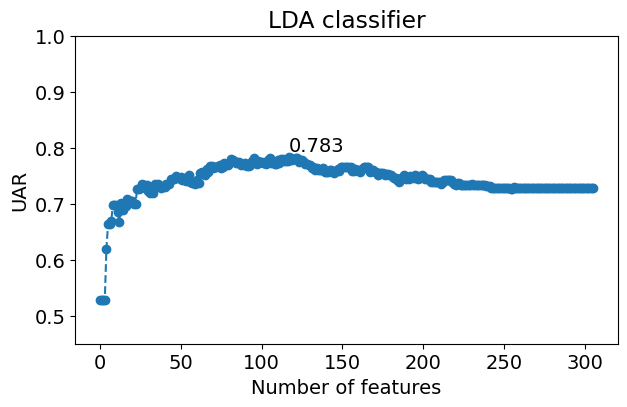

uar_best = 0.78285256
best uar (LDA) =  0.7828525641025641 Number of features =  117
NEW ROUND
Iter #0: 0.783 <-> 0.783
Iter #1: 0.783 <-> 0.783
Iter #2: 0.783 <-> 0.783
Iter #3: 0.783 <-> 0.783
Iter #6: 0.783 <-> 0.783
Iter #8: 0.783 <-> 0.783
Iter #9: 0.783 <-> 0.783
Iter #10: 0.783 <-> 0.783
Iter #12: 0.783 <-> 0.783
Iter #18: 0.783 <-> 0.783
Iter #19: 0.783 <-> 0.783
Iter #20: 0.783 <-> 0.783
Iter #22: 0.783 <-> 0.783
Iter #24: 0.783 <-> 0.783
Iter #27: 0.784 <-> 0.783
Iter #28: 0.785 <-> 0.783
Iter #29: 0.786 <-> 0.783
Iter #30: 0.785 <-> 0.783
Iter #33: 0.788 <-> 0.783
Iter #37: 0.783 <-> 0.783
Iter #42: 0.787 <-> 0.783
Iter #49: 0.787 <-> 0.783
Iter #52: 0.784 <-> 0.783
Iter #53: 0.786 <-> 0.783
Iter #54: 0.790 <-> 0.783
Iter #55: 0.785 <-> 0.783
Iter #57: 0.784 <-> 0.783
Iter #60: 0.785 <-> 0.783
Iter #61: 0.785 <-> 0.783
Iter #62: 0.784 <-> 0.783
Iter #68: 0.784 <-> 0.783
Iter #70: 0.783 <-> 0.783
Iter #71: 0.786 <-> 0.783
Iter #72: 0.785 <-> 0.783
Iter #73: 0.784 <-> 0.783
It

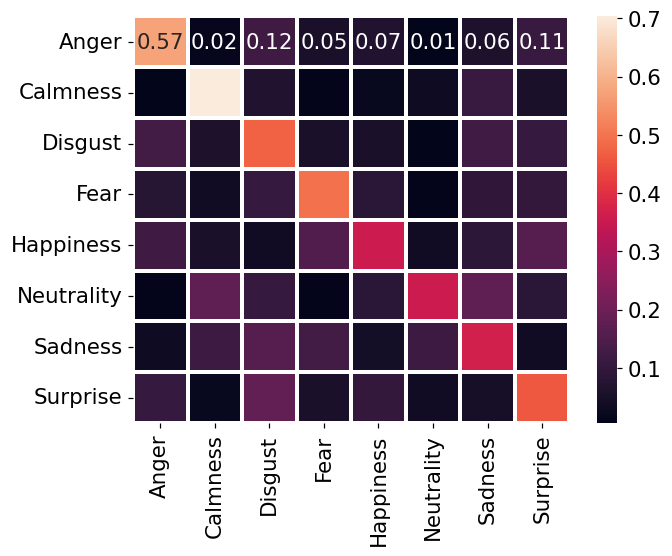

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.572917  0.015625  0.119792  0.052083   0.067708    0.005208   
Calmness    0.005208  0.703125  0.067708  0.010417   0.020833    0.031250   
Disgust     0.130208  0.057292  0.473958  0.052083   0.052083    0.005208   
Fear        0.078125  0.036458  0.104167  0.494792   0.083333    0.010417   
Happiness   0.119792  0.052083  0.036458  0.151042   0.354167    0.036458   
Neutrality  0.010417  0.177083  0.104167  0.010417   0.083333    0.354167   
Sadness     0.031250  0.114583  0.161458  0.130208   0.041667    0.114583   
Surprise    0.104167  0.020833  0.182292  0.052083   0.098958    0.036458   

             Sadness  Surprise  
Anger       0.057292  0.109375  
Calmness    0.109375  0.052083  
Disgust     0.125000  0.104167  
Fear        0.093750  0.098958  
Happiness   0.088542  0.161458  
Neutrality  0.177083  0.083333  
Sadness     0.369792  0.036458  
Surprise    0.046875  0.458333  
Saving co

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:05<18:03,  5.45s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:10<18:03,  5.47s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coord

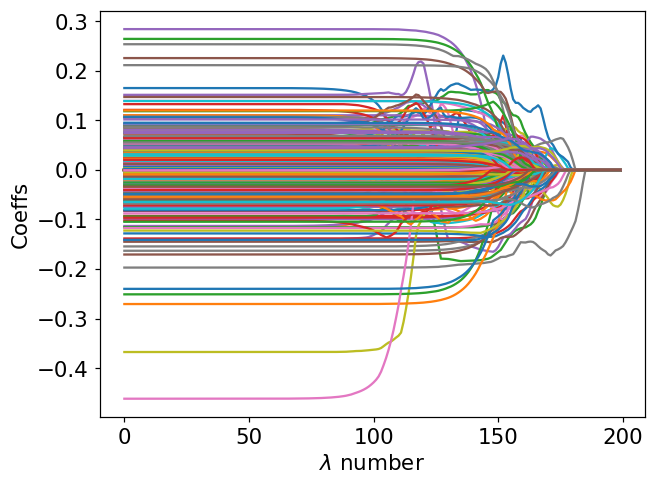

  1%|▏         | 4/306 [00:00<00:09, 32.51it/s]

Iter =  1  UAR = 0.5929
Iter =  2  UAR = 0.6106
Iter =  3  UAR = 0.6326
Iter =  4  UAR = 0.6348
Iter =  5  UAR = 0.6899
Iter =  7  UAR = 0.7021


  4%|▍         | 12/306 [00:00<00:09, 29.75it/s]

Iter =  8  UAR = 0.7065


  8%|▊         | 24/306 [00:00<00:11, 25.01it/s]

Iter =  20  UAR = 0.7161


  9%|▉         | 27/306 [00:01<00:11, 23.79it/s]

Iter =  25  UAR = 0.7314


 11%|█         | 33/306 [00:01<00:13, 20.77it/s]

Iter =  30  UAR = 0.7358
Iter =  31  UAR = 0.7362
Iter =  33  UAR = 0.7410


 18%|█▊        | 55/306 [00:02<00:20, 12.46it/s]

Iter =  55  UAR = 0.7432


 35%|███▌      | 108/306 [00:11<00:47,  4.18it/s]

Iter =  108  UAR = 0.7468


 37%|███▋      | 112/306 [00:12<00:51,  3.77it/s]

Iter =  112  UAR = 0.7482


100%|██████████| 306/306 [01:59<00:00,  2.57it/s]


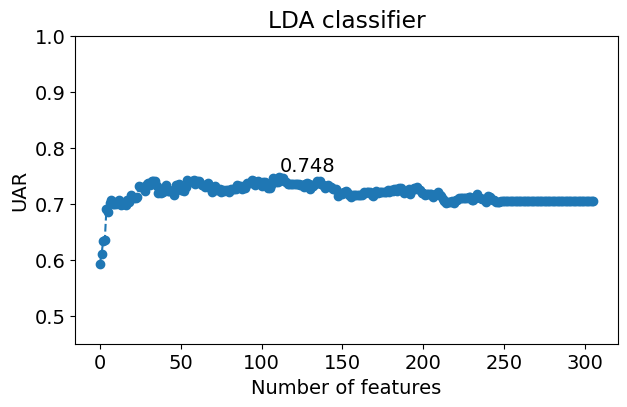

uar_best = 0.74819712
best uar (LDA) =  0.7481971153846154 Number of features =  111
NEW ROUND
Iter #1: 0.750 <-> 0.748
Iter #3: 0.751 <-> 0.748
Iter #4: 0.750 <-> 0.748
Iter #8: 0.753 <-> 0.748
Iter #12: 0.751 <-> 0.748
Iter #19: 0.750 <-> 0.748
Iter #27: 0.750 <-> 0.748
Iter #31: 0.749 <-> 0.748
Iter #33: 0.751 <-> 0.748
Iter #34: 0.750 <-> 0.748
Iter #36: 0.751 <-> 0.748
Iter #44: 0.751 <-> 0.748
Iter #47: 0.749 <-> 0.748
Iter #51: 0.750 <-> 0.748
Iter #52: 0.750 <-> 0.748
Iter #57: 0.749 <-> 0.748
Iter #60: 0.749 <-> 0.748
Iter #61: 0.748 <-> 0.748
Iter #62: 0.751 <-> 0.748
Iter #67: 0.752 <-> 0.748
Iter #71: 0.750 <-> 0.748
Iter #74: 0.750 <-> 0.748
Iter #76: 0.754 <-> 0.748
Iter #78: 0.750 <-> 0.748
Iter #80: 0.749 <-> 0.748
Iter #81: 0.748 <-> 0.748
Iter #82: 0.748 <-> 0.748
Iter #83: 0.748 <-> 0.748
Iter #87: 0.748 <-> 0.748
Iter #92: 0.748 <-> 0.748
Iter #93: 0.748 <-> 0.748
Iter #96: 0.749 <-> 0.748
Iter #99: 0.748 <-> 0.748
Iter #103: 0.750 <-> 0.748
Iter #104: 0.748 <-> 0.7

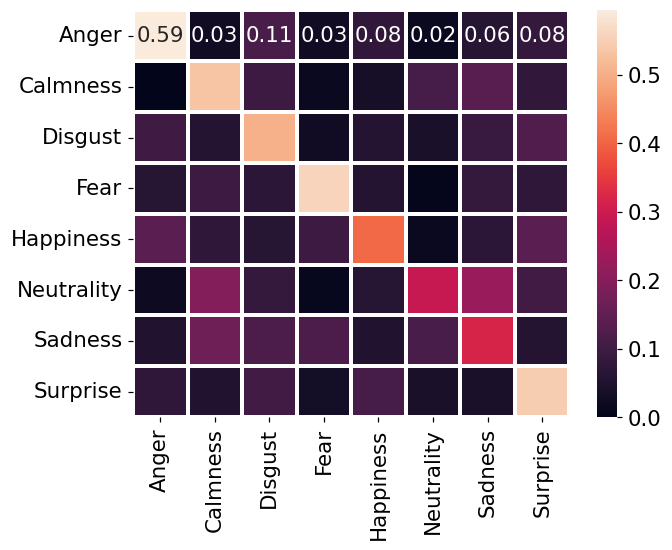

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.593750  0.026042  0.114583  0.026042   0.078125    0.015625   
Calmness    0.000000  0.531250  0.093750  0.015625   0.036458    0.109375   
Disgust     0.098958  0.057292  0.505208  0.026042   0.057292    0.041667   
Fear        0.062500  0.093750  0.067708  0.557292   0.057292    0.005208   
Happiness   0.140625  0.072917  0.062500  0.093750   0.406250    0.015625   
Neutrality  0.020833  0.197917  0.083333  0.010417   0.062500    0.291667   
Sadness     0.052083  0.166667  0.119792  0.119792   0.052083    0.114583   
Surprise    0.072917  0.052083  0.104167  0.031250   0.109375    0.041667   

             Sadness  Surprise  
Anger       0.062500  0.083333  
Calmness    0.135417  0.078125  
Disgust     0.088542  0.125000  
Fear        0.083333  0.072917  
Happiness   0.067708  0.140625  
Neutrality  0.229167  0.104167  
Sadness     0.317708  0.057292  
Surprise    0.041667  0.546875  
Saving co

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:05<17:56,  5.41s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:10<16:37,  5.04s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coord

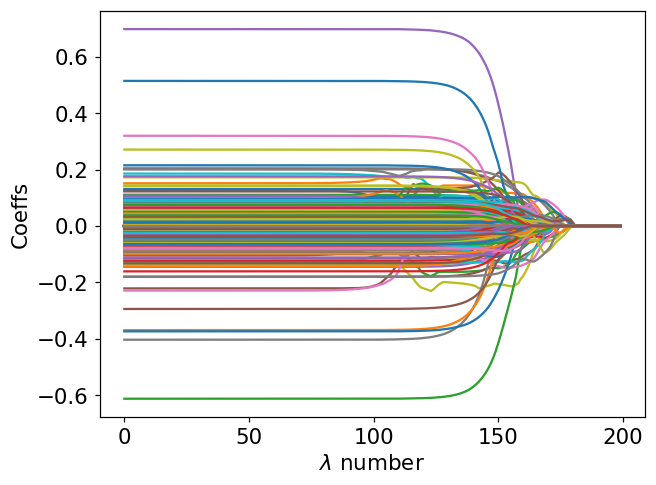

  1%|▏         | 4/306 [00:00<00:09, 31.49it/s]

Iter =  1  UAR = 0.5000
Iter =  2  UAR = 0.5086
Iter =  3  UAR = 0.5234
Iter =  4  UAR = 0.5236
Iter =  5  UAR = 0.5369
Iter =  6  UAR = 0.5563
Iter =  7  UAR = 0.5631


  4%|▍         | 12/306 [00:00<00:09, 29.45it/s]

Iter =  8  UAR = 0.5940
Iter =  9  UAR = 0.5996
Iter =  10  UAR = 0.6128
Iter =  11  UAR = 0.6176
Iter =  12  UAR = 0.6190
Iter =  13  UAR = 0.6338


  7%|▋         | 21/306 [00:00<00:10, 26.27it/s]

Iter =  19  UAR = 0.6470
Iter =  22  UAR = 0.6508
Iter =  23  UAR = 0.6546


  9%|▉         | 27/306 [00:01<00:11, 23.98it/s]

Iter =  26  UAR = 0.6703
Iter =  27  UAR = 0.6715
Iter =  29  UAR = 0.6747


 11%|█         | 33/306 [00:01<00:12, 21.01it/s]

Iter =  31  UAR = 0.6751
Iter =  33  UAR = 0.6861


 12%|█▏        | 36/306 [00:01<00:13, 19.94it/s]

Iter =  36  UAR = 0.7043


 15%|█▍        | 45/306 [00:02<00:16, 16.06it/s]

Iter =  43  UAR = 0.7051


 15%|█▌        | 47/306 [00:02<00:17, 15.19it/s]

Iter =  46  UAR = 0.7085
Iter =  48  UAR = 0.7155


 31%|███▏      | 96/306 [00:08<00:37,  5.55it/s]

Iter =  96  UAR = 0.7202


 33%|███▎      | 100/306 [00:09<00:40,  5.02it/s]

Iter =  100  UAR = 0.7206


 33%|███▎      | 102/306 [00:09<00:42,  4.78it/s]

Iter =  102  UAR = 0.7214


 34%|███▎      | 103/306 [00:09<00:43,  4.67it/s]

Iter =  103  UAR = 0.7240


 34%|███▍      | 104/306 [00:10<00:44,  4.56it/s]

Iter =  104  UAR = 0.7274


 37%|███▋      | 112/306 [00:12<00:50,  3.85it/s]

Iter =  112  UAR = 0.7332


 40%|███▉      | 122/306 [00:15<00:57,  3.20it/s]

Iter =  122  UAR = 0.7338


 42%|████▏     | 129/306 [00:17<00:57,  3.08it/s]

Iter =  129  UAR = 0.7364


 42%|████▏     | 130/306 [00:17<00:55,  3.18it/s]

Iter =  130  UAR = 0.7474


 46%|████▋     | 142/306 [00:21<00:56,  2.93it/s]

Iter =  142  UAR = 0.7538


100%|██████████| 306/306 [01:58<00:00,  2.58it/s]


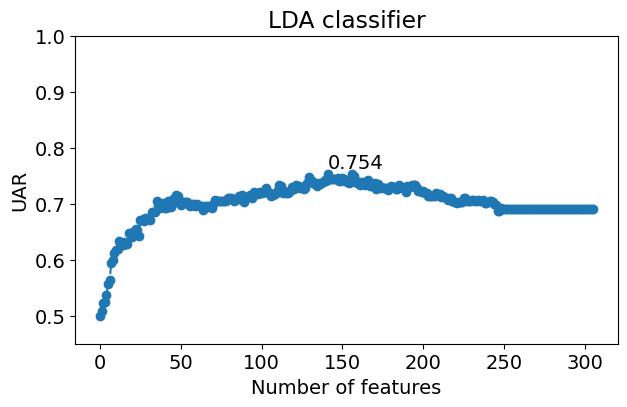

uar_best = 0.75380609
best uar (LDA) =  0.7538060897435896 Number of features =  141
NEW ROUND
Iter #1: 0.759 <-> 0.754
Iter #8: 0.756 <-> 0.754
Iter #16: 0.756 <-> 0.754
Iter #24: 0.756 <-> 0.754
Iter #27: 0.754 <-> 0.754
Iter #33: 0.754 <-> 0.754
Iter #36: 0.762 <-> 0.754
Iter #43: 0.754 <-> 0.754
Iter #44: 0.754 <-> 0.754
Iter #45: 0.754 <-> 0.754
Iter #52: 0.754 <-> 0.754
Iter #53: 0.754 <-> 0.754
Iter #54: 0.754 <-> 0.754
Iter #55: 0.754 <-> 0.754
Iter #62: 0.754 <-> 0.754
Iter #63: 0.754 <-> 0.754
Iter #73: 0.754 <-> 0.754
Iter #74: 0.754 <-> 0.754
Iter #75: 0.754 <-> 0.754
Iter #76: 0.754 <-> 0.754
Iter #80: 0.754 <-> 0.754
Iter #81: 0.754 <-> 0.754
Iter #84: 0.754 <-> 0.754
Iter #87: 0.754 <-> 0.754
Iter #105: 0.762 <-> 0.754
Iter #120: 0.756 <-> 0.754
Iter #132: 0.754 <-> 0.754
Iter #135: 0.757 <-> 0.754
Iter #136: 0.754 <-> 0.754
Iter #140: 0.754 <-> 0.754
Withdraw feature #36, added accracy 0.008012820512820595
NEW ROUND
Iter #8: 0.764 <-> 0.762
Iter #25: 0.763 <-> 0.762
Ite

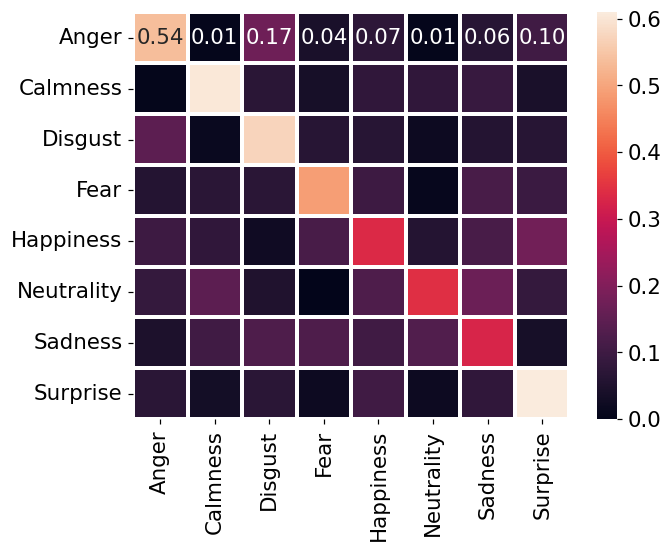

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.536458  0.005208  0.171875  0.041667   0.072917    0.005208   
Calmness    0.005208  0.604167  0.067708  0.036458   0.078125    0.078125   
Disgust     0.145833  0.015625  0.572917  0.062500   0.062500    0.020833   
Fear        0.057292  0.067708  0.067708  0.489583   0.098958    0.010417   
Happiness   0.098958  0.078125  0.026042  0.114583   0.333333    0.057292   
Neutrality  0.083333  0.145833  0.052083  0.000000   0.125000    0.343750   
Sadness     0.046875  0.104167  0.125000  0.125000   0.104167    0.130208   
Surprise    0.067708  0.031250  0.067708  0.020833   0.104167    0.020833   

             Sadness  Surprise  
Anger       0.062500  0.104167  
Calmness    0.088542  0.041667  
Disgust     0.057292  0.062500  
Fear        0.114583  0.093750  
Happiness   0.114583  0.177083  
Neutrality  0.166667  0.083333  
Sadness     0.328125  0.036458  
Surprise    0.078125  0.609375  
Saving co

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  0%|          | 1/200 [00:04<16:05,  4.85s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+02, tolerance: 6.656e-02
  model = cd_fast.enet_coordinate_descent(
  1%|          | 2/200 [00:09<15:56,  4.83s/it]c:\Users\Maksim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coord

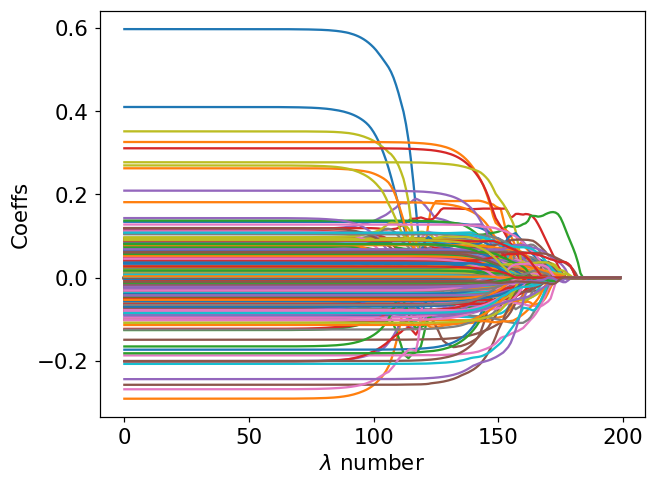

  1%|          | 3/306 [00:00<00:10, 29.99it/s]

Iter =  1  UAR = 0.5074
Iter =  6  UAR = 0.5647
Iter =  7  UAR = 0.5687


  4%|▎         | 11/306 [00:00<00:09, 30.04it/s]

Iter =  8  UAR = 0.5721
Iter =  9  UAR = 0.5879
Iter =  11  UAR = 0.6056
Iter =  12  UAR = 0.6110
Iter =  13  UAR = 0.6140
Iter =  14  UAR = 0.6252


  6%|▌         | 18/306 [00:00<00:10, 27.46it/s]

Iter =  15  UAR = 0.6286
Iter =  16  UAR = 0.6330
Iter =  17  UAR = 0.6346
Iter =  18  UAR = 0.6468
Iter =  20  UAR = 0.6538


  8%|▊         | 24/306 [00:00<00:11, 25.05it/s]

Iter =  21  UAR = 0.6579
Iter =  22  UAR = 0.6605
Iter =  23  UAR = 0.6679
Iter =  24  UAR = 0.6753
Iter =  25  UAR = 0.6781


  9%|▉         | 27/306 [00:01<00:11, 23.83it/s]

Iter =  26  UAR = 0.6837
Iter =  27  UAR = 0.6855
Iter =  29  UAR = 0.6989
Iter =  30  UAR = 0.7005


 11%|█         | 33/306 [00:01<00:13, 20.90it/s]

Iter =  31  UAR = 0.7125


 12%|█▏        | 36/306 [00:01<00:13, 19.80it/s]

Iter =  36  UAR = 0.7127
Iter =  37  UAR = 0.7131
Iter =  38  UAR = 0.7173
Iter =  39  UAR = 0.7188


 14%|█▍        | 43/306 [00:01<00:15, 16.90it/s]

Iter =  41  UAR = 0.7262
Iter =  42  UAR = 0.7302
Iter =  43  UAR = 0.7340
Iter =  44  UAR = 0.7358


 16%|█▌        | 49/306 [00:02<00:17, 14.45it/s]

Iter =  47  UAR = 0.7482
Iter =  49  UAR = 0.7546


 17%|█▋        | 51/306 [00:02<00:18, 13.70it/s]

Iter =  50  UAR = 0.7576
Iter =  52  UAR = 0.7600


 18%|█▊        | 55/306 [00:02<00:20, 12.23it/s]

Iter =  53  UAR = 0.7628
Iter =  54  UAR = 0.7654
Iter =  55  UAR = 0.7658


 19%|█▊        | 57/306 [00:03<00:21, 11.69it/s]

Iter =  56  UAR = 0.7728
Iter =  57  UAR = 0.7734
Iter =  58  UAR = 0.7738


 19%|█▉        | 59/306 [00:03<00:22, 11.21it/s]

Iter =  59  UAR = 0.7750
Iter =  61  UAR = 0.7772


 22%|██▏       | 67/306 [00:04<00:24,  9.74it/s]

Iter =  66  UAR = 0.7817
Iter =  67  UAR = 0.7865


100%|██████████| 306/306 [01:58<00:00,  2.58it/s]


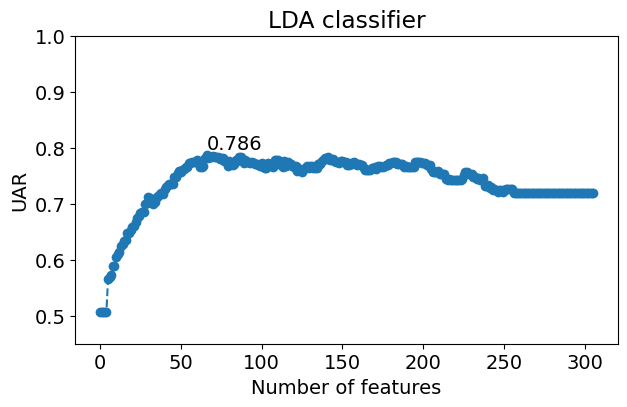

uar_best = 0.78645833
best uar (LDA) =  0.7864583333333333 Number of features =  66
NEW ROUND
Iter #0: 0.786 <-> 0.786
Iter #1: 0.786 <-> 0.786
Iter #2: 0.786 <-> 0.786
Iter #3: 0.786 <-> 0.786
Iter #7: 0.789 <-> 0.786
Iter #9: 0.786 <-> 0.786
Iter #17: 0.787 <-> 0.786
Iter #18: 0.787 <-> 0.786
Iter #21: 0.787 <-> 0.786
Iter #23: 0.790 <-> 0.786
Iter #27: 0.786 <-> 0.786
Iter #32: 0.789 <-> 0.786
Iter #36: 0.787 <-> 0.786
Iter #40: 0.788 <-> 0.786
Iter #43: 0.790 <-> 0.786
Iter #44: 0.787 <-> 0.786
Iter #49: 0.787 <-> 0.786
Iter #51: 0.786 <-> 0.786
Iter #53: 0.791 <-> 0.786
Withdraw feature #53, added accracy 0.004407051282051322
NEW ROUND
Iter #16: 0.791 <-> 0.791
Iter #17: 0.792 <-> 0.791
Iter #21: 0.791 <-> 0.791
Iter #22: 0.791 <-> 0.791
Iter #23: 0.791 <-> 0.791
Iter #24: 0.791 <-> 0.791
Iter #25: 0.791 <-> 0.791
Iter #29: 0.792 <-> 0.791
Iter #32: 0.795 <-> 0.791
Iter #44: 0.792 <-> 0.791
Iter #52: 0.793 <-> 0.791
Iter #56: 0.793 <-> 0.791
Iter #57: 0.791 <-> 0.791
Iter #65: 0.7

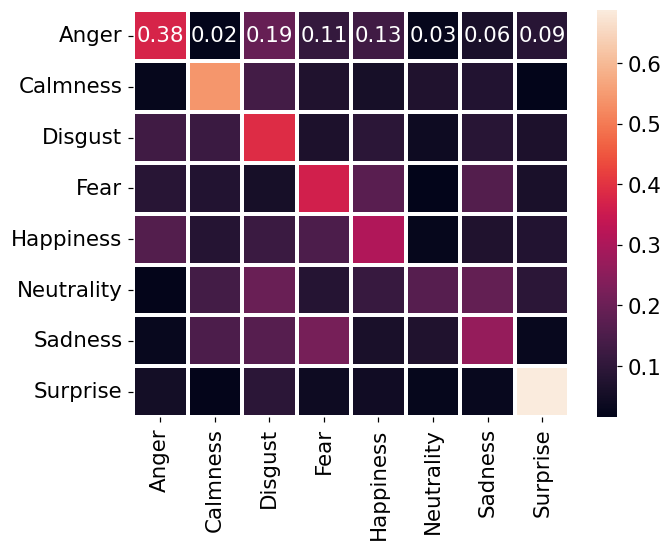

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.375000  0.015625  0.192708  0.109375   0.130208    0.026042   
Calmness    0.026042  0.541667  0.135417  0.072917   0.057292    0.072917   
Disgust     0.130208  0.119792  0.390625  0.067708   0.093750    0.041667   
Fear        0.088542  0.078125  0.057292  0.364583   0.171875    0.015625   
Happiness   0.161458  0.083333  0.119792  0.151042   0.307292    0.026042   
Neutrality  0.020833  0.135417  0.197917  0.083333   0.114583    0.166667   
Sadness     0.031250  0.151042  0.166667  0.218750   0.062500    0.072917   
Surprise    0.052083  0.020833  0.093750  0.041667   0.046875    0.026042   

             Sadness  Surprise  
Anger       0.062500  0.088542  
Calmness    0.078125  0.015625  
Disgust     0.088542  0.067708  
Fear        0.161458  0.062500  
Happiness   0.072917  0.078125  
Neutrality  0.187500  0.093750  
Sadness     0.265625  0.031250  
Surprise    0.031250  0.687500  
Saving co

In [5]:
Emotions = ['happy','neutral','sad','calm','fear','disgust','surprised']

for emotion_label in Emotions:
    # Relabeling and normilizing
    y_true = np.zeros((len(y)))
    y_true[np.squeeze(y.values==emotion_label)] = 1
    y_true[y_true==0] = -1

    X_data = X.values
    X_norm = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
    y_reg = copy.copy(y_true)

    try:
        Rank = np.load(f'../../data/lda/Lasso_Ranking_lda_{emotion_label}_result.npy')
    except:
        print("We need to compute LASSO ranking")

        # LASSO ranking
        Lasso_model = linear_model.Lasso()
        Npt = 200
        coeffs = np.zeros((X_norm.shape[1],Npt))
        lambda_ = np.logspace(-12.5, 0.3, Npt)
        i = 0
        for lamb in tqdm(lambda_):
            Lasso_model = linear_model.Lasso(alpha=lamb, max_iter=20000)
            Lasso_model.fit(X_norm,y_reg)
            coeffs[:,i] = Lasso_model.coef_
            i = i + 1

        plt.figure(dpi=110)
        plt.plot(coeffs.T)
        plt.xlabel('$\lambda$ number')
        plt.ylabel('Coeffs')
        plt.show()

        Rank_lasso = []
        for i in range(coeffs.shape[1]-1,-1,-1):
            withdraw_features = np.nonzero(coeffs[:,i])[0];
            something_new = np.setdiff1d(withdraw_features, Rank_lasso)
            if len(something_new):
                for ii in range(len(something_new)):
                    Rank_lasso.append(something_new[ii])
        
        np.save(f'../../data/lda/Lasso_Ranking_lda_{emotion_label}_result.npy', Rank_lasso)    # .npy extension is added if not given
        Rank = np.load(f'../../data/lda/Lasso_Ranking_lda_{emotion_label}_result.npy')

    try:
        uar_lda = np.load(f'../../data/lda/feature_lda_uar_total_{emotion_label}.npy')
    except:
        # LOSO accuracy estimation
        uar_lda = []
        uar_best = 0
        ind_best = 0
        for k in tqdm(range(1,len(Rank)+1)):
            feature_inds = Rank[:k]
            uar,_,_ = LDA_eval(X, pd.DataFrame(y_reg), feature_inds, ID)    
            uar_lda.append(uar)
            if (uar>uar_best):
                uar_best = uar
                ind_best = k-1
                print('Iter = ', k, f' UAR = {uar:.4f}' )
        
        fig,ax=plt.subplots(figsize=(7,4),dpi=100)
        plt.rcParams.update({'font.size': 14})
        plt.plot(uar_lda,marker='o', linestyle='dashed')
        plt.text(ind_best, uar_best+0.01, f'{uar_best:.3f}')
        plt.xlabel('Number of features')
        plt.ylabel('UAR')
        plt.title('LDA classifier')
        plt.ylim([0.45, 1.00])
        plt.show()
        
        print(f'uar_best = {uar_best:.8f}')
        print('best uar (LDA) = ', np.max(uar_lda), 'Number of features = ', np.argmax(uar_lda))

        np.save(f'../../data/lda/feature_lda_uar_total_{emotion_label}.npy', uar_lda)    # .npy extension is added if not given
        uar_lda = np.load(f'../../data/lda/feature_lda_uar_total_{emotion_label}.npy')
    
    # image_name = 'figures\\ACC_LDA_.jpg'
    # fig.savefig(image_name, bbox_inches='tight', pad_inches = 0.2)

    try:
        feature_ind = np.load(f'../../data/lda/feature_LDA_idx_{emotion_label}.npy')
    except:
        # Backward step selection
        ind_best = np.argmax(uar_lda)
        [acc_final,feature_ind] = back_step_selection_lda(X, pd.DataFrame(y_reg), Rank[:ind_best+1],ID)
        np.save(f'../../data/lda/feature_LDA_idx_{emotion_label}.npy', feature_ind)    # .npy extension is added if not given
        feature_ind = np.load(f'../../data/lda/feature_LDA_idx_{emotion_label}.npy')

    # 5-fold CV (selected feature space)
    group_members= data_loader.get_k_fold_group_member()
    X_new = pd.DataFrame(X_norm[:,feature_ind])
    X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
    model = LinearDiscriminantAnalysis()
    UAR,y_pred,y_true = model_training.estimate_model(model, X_k_folds, y_k_folds)
    plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'confusion_matrix_LDA_{emotion_label}.jpg')
    print(f'UAR final = {UAR:.3f}')

# Backward step selection

In [4]:
def back_step_selection_lda(X,y,feature_ind, ID):
# BACK_STEP_SELECTION Automatic procedure of feature selection

#basic version
   # acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
   acc_mu_curr,_,_ = LDA_eval(X, y, feature_ind, ID)
   some_feature_droped = True
   while (some_feature_droped):
      print('NEW ROUND')
      acc_up = -np.ones_like(feature_ind).astype(np.double)
      for i in range(len(feature_ind)):
         cur_inds = np.setdiff1d(feature_ind,feature_ind[i])
         # acc_mu = LDA_LOSO_eval(X,y,cur_inds, ID)
         acc_mu,_,_ = LDA_eval(X, y, cur_inds, ID)                  
         
         if (acc_mu>=acc_mu_curr):
            acc_up[i] = acc_mu-acc_mu_curr
            print(f'Iter #{i}: {acc_mu:.3f} <-> {acc_mu_curr:.3f}')
            
      m_val = np.max(acc_up)
      m_ind = np.argmax(acc_up)
      
      if (m_val>=0):
         print(f'Withdraw feature #{m_ind}, added accracy {m_val}')
         feature_ind = np.setdiff1d(feature_ind,feature_ind[m_ind]);
         some_feature_droped = True       
         # new basic version
         # acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
         acc_mu_curr,_,_ = LDA_eval(X, y, feature_ind, ID)
      else:
         acc_final = acc_mu_curr
         some_feature_droped = False

   return acc_final, feature_ind

# 5-fold CV (full feature space)

In [6]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm)
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

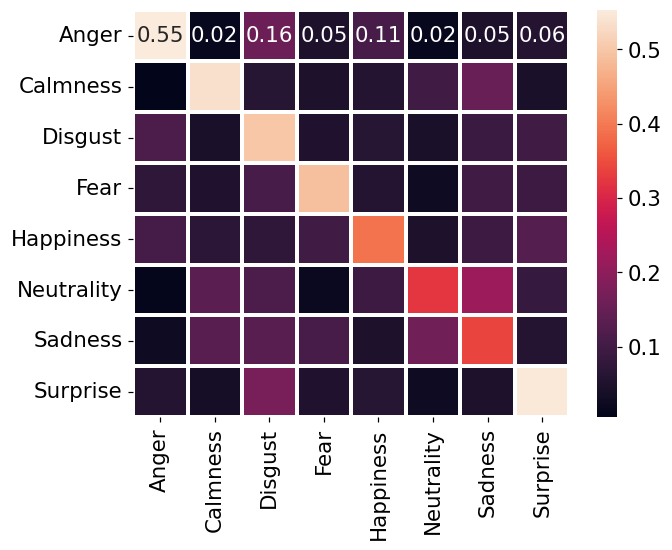

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.552083  0.015625  0.156250  0.046875   0.109375    0.015625   
Calmness    0.005208  0.536458  0.062500  0.046875   0.057292    0.098958   
Disgust     0.114583  0.041667  0.500000  0.052083   0.062500    0.041667   
Fear        0.072917  0.052083  0.109375  0.489583   0.057292    0.026042   
Happiness   0.104167  0.067708  0.072917  0.098958   0.390625    0.046875   
Neutrality  0.010417  0.135417  0.114583  0.020833   0.093750    0.322917   
Sadness     0.026042  0.130208  0.130208  0.109375   0.046875    0.161458   
Surprise    0.057292  0.036458  0.171875  0.052083   0.062500    0.026042   

             Sadness  Surprise  
Anger       0.046875  0.057292  
Calmness    0.151042  0.041667  
Disgust     0.088542  0.098958  
Fear        0.098958  0.093750  
Happiness   0.093750  0.125000  
Neutrality  0.218750  0.083333  
Sadness     0.338542  0.057292  
Surprise    0.046875  0.546875  
Saving co

In [8]:
model = LinearDiscriminantAnalysis()

UAR,y_pred,y_true = model_training.estimate_model(model, X_k_folds, y_k_folds)
# Confusion matrix
plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'../../data/lda/confusion_matrix_LDA_full.jpg')
print(f'UAR final = {UAR:.3f}')

# Joint subset of features

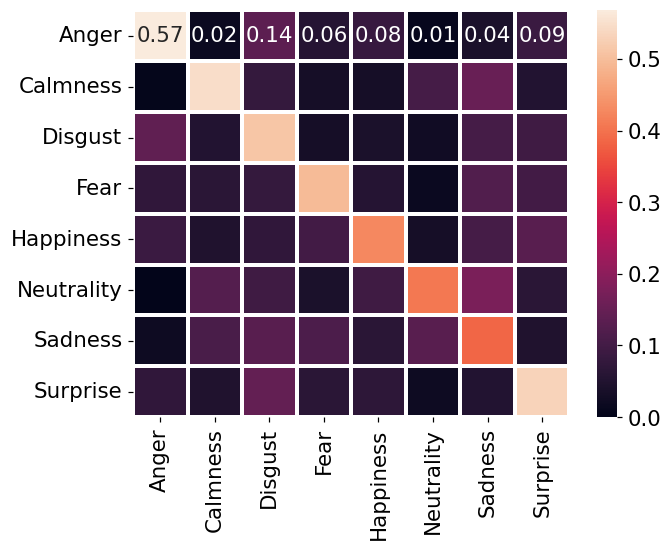

               Anger  Calmness   Disgust      Fear  Happiness  Neutrality  \
Anger       0.567708  0.015625  0.135417  0.057292   0.083333    0.010417   
Calmness    0.005208  0.546875  0.078125  0.031250   0.031250    0.104167   
Disgust     0.140625  0.052083  0.510417  0.031250   0.041667    0.026042   
Fear        0.072917  0.062500  0.078125  0.494792   0.057292    0.015625   
Happiness   0.088542  0.046875  0.072917  0.098958   0.427083    0.031250   
Neutrality  0.000000  0.125000  0.093750  0.041667   0.093750    0.406250   
Sadness     0.020833  0.109375  0.130208  0.114583   0.062500    0.130208   
Surprise    0.072917  0.046875  0.145833  0.062500   0.067708    0.020833   

             Sadness  Surprise  
Anger       0.041667  0.088542  
Calmness    0.151042  0.052083  
Disgust     0.104167  0.093750  
Fear        0.119792  0.098958  
Happiness   0.104167  0.130208  
Neutrality  0.177083  0.062500  
Sadness     0.385417  0.046875  
Surprise    0.052083  0.531250  
Saving co

In [10]:
Emotions = ['happy','neutral','sad','calm','fear','disgust','surprised']
feature_joint_inds = []

for Emotion_label in Emotions:
    feature_ind = np.load(f'../../data/lda/feature_LDA_idx_{Emotion_label}.npy')
    feature_joint_inds = np.unique(np.concatenate((feature_joint_inds, feature_ind)))

feature_joint_inds = feature_joint_inds.astype(int)

group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm[:,feature_joint_inds])
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
model = LinearDiscriminantAnalysis()
UAR,y_pred,y_true = model_training.estimate_model(model, X_k_folds, y_k_folds)
plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'../../data/lda/confusion_matrix_LDA_joint_features.jpg')
print(f'UAR final = {UAR:.3f}')